# Import

In [136]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import pandas as pd
import random
import file_operations
import os
style.use('fivethirtyeight')

# Build my own KNN algorithm

## Initiate a simple dataset to test

In [137]:
dataset = {'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}
new_point = [5, 7]

In [138]:
print(len(dataset))

2


## Graphing

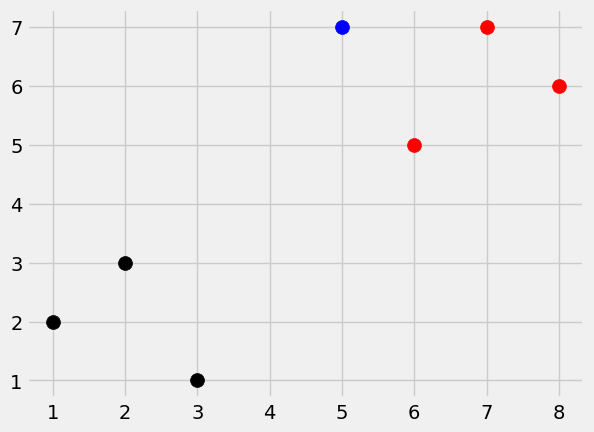

In [139]:
[[plt.scatter(ii[0], ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100, color = 'b')
plt.show()

## Implement K nearest neighbor (Self-Built)

In [140]:
def k_nearest_neighbor(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups! Idiot!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

result, confidence1 = k_nearest_neighbor(dataset, new_point, k = 3)
print(result, confidence1)

r 1.0


# Use actual data to test my algorithm

## Import file

In [141]:
current_dir = os.getcwd()
print(current_dir)
paths = file_operations.create_project_path('Project 5 KNN')
file_name = 'breast-cancer-wisconsin.data'
file_path = os.path.join(paths["data_dir"], file_name)
df = pd.read_csv(file_path)
display(df)

d:\Important Files\Repositories\Machine-Learning-Project-related\Project 5 KNN
Project directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 5 KNN'
Project data directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 5 KNN\Data'
Project output directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 5 KNN\Output'


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_spith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [142]:
df.replace('?', np.nan, inplace = True)
df.dropna(inplace = True)
# df.replace('?', -99999, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [143]:
full_data = df.astype('float64').values.tolist()
print(full_data[:5])

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]


## Randomize the data

In [144]:
random.shuffle(full_data)
print(full_data[:5])

[[2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [3.0, 6.0, 4.0, 10.0, 3.0, 3.0, 3.0, 4.0, 1.0, 4.0], [10.0, 5.0, 8.0, 10.0, 3.0, 10.0, 5.0, 1.0, 3.0, 4.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0, 2.0]]


## Train test split

In [145]:
test_size = 0.2
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}
delimeter = -int(test_size * len(full_data))
train_data = full_data[:delimeter]
test_data = full_data[delimeter:]

## Populating the data

In [146]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

## Getting the accuracy

In [147]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence2 = k_nearest_neighbor(train_set, data, k = 5)
        if group == vote:
            correct += 1
        else:
            print(confidence2)
        total += 1
        
accuracy = correct / total
print(accuracy)

1.0
0.8
1.0
0.6
1.0
0.8
0.8
0.9485294117647058
